# Uber Analysis

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Pre Procesamiento

In [2]:
# Descomprimiendo los archivos
import zipfile

data_zip = zipfile.ZipFile('data/data.zip')
data_zip.extractall('data/')
data_zip.close()

In [3]:
# Carga de datos
data = pd.read_csv('data/uber-raw-data-janjune-15.csv', encoding='utf-8')
data.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [4]:
# Dimension del conjunto de datos
data.shape

(14270479, 4)

## Analisis exploratorio

In [5]:
# Descripcion del dataSet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


## Procesamiento de datos

In [6]:
# Datos duplicados
data.duplicated().sum()

898225

In [7]:
# Eliminacion de datos suplicados
data.drop_duplicates(inplace=True)
data.shape

(13372254, 4)

# Analisis

## 1 - Mes con mayor cantidad de actividad
Con este análisis, se pretende encontrar el mes con mayor cantidad de viajes realizados en la ciudad de Nueva York.

In [8]:
# Obtener el typo de dato de la columna <Pickup_date>
data['Pickup_date'].dtype

dtype('O')

In [9]:
# Transformar el tipo de dato de la columna <Pickup_date> al formato datatime (Y-M-D H:M:S)
data['Pickup_date'] = pd.to_datetime(data['Pickup_date'], format='%Y-%m-%d %H:%M:%S')
data['Pickup_date'].dtype

dtype('<M8[ns]')

In [10]:
# Extraer el mes de <Pickup_date> y agregarlo a la nueva columna <month>
data['month']=data['Pickup_date'].dt.month
data.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month
0,B02617,2015-05-17 09:47:00,B02617,141,5
1,B02617,2015-05-17 09:47:00,B02617,65,5
2,B02617,2015-05-17 09:47:00,B02617,100,5
3,B02617,2015-05-17 09:47:00,B02774,80,5
4,B02617,2015-05-17 09:47:00,B02617,90,5


In [11]:
# Cantidad de viajes por mes
data['month'].value_counts()

6    2571771
5    2483980
2    2222189
4    2112705
3    2062639
1    1918970
Name: month, dtype: int64

<AxesSubplot: >

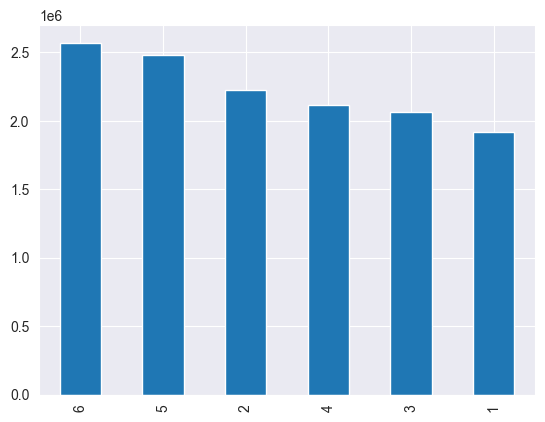

In [12]:
# Visualizacion
data['month'].value_counts().plot(kind='bar')

---
*Gracias al análisis realizado, se pudo observar que: El mes que presenta mayor cantidad de viajes en la ciudad de Nueva York fue el mes de __junio__, con un total de __2571771__ viajes.*
---
---

## 2 - Días con mayor cantidad de actividad
Con este análisis, se pretende encontrar los días con mayor cantidad de viajes realizados en la ciudad de Nueva York.

In [13]:
# Desestructuración de los datos de <Pickup_date> en features individuales (weekday ,day ,hour ,month ,minute)
data['weekday'] = data['Pickup_date'].dt.day_name()
data['day'] = data['Pickup_date'].dt.day
data['hour'] = data['Pickup_date'].dt.hour
data['month'] = data['Pickup_date'].dt.month
data['minute'] = data['Pickup_date'].dt.minute

data.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,5,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,5,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,5,Sunday,17,9,47


In [14]:
# Obteniendo la sumatoria de la cantidad de viajes realizados por día de cada mez en particular
data.groupby(['month','weekday'],as_index=False).size()

,month,weekday,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319
5,1,Tuesday,196574
6,1,Wednesday,245650
7,2,Friday,373550
8,2,Monday,274948
9,2,Saturday,368311


In [15]:
# Creando un dataFrame temporal con la información anterior
temp=data.groupby(['month','weekday'],as_index=False).size()
temp.head()

,month,weekday,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319


In [16]:
# Unificando los datos de los meses correspondientes
temp['month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [17]:
# Creación del diccionario para el mapeo de los meses con sus números
dict_month={1:'Jan', 2:'Feb', 3:'March', 4:'april', 5:'May', 6:'June'}

# Mapeo
temp['month'] = temp['month'].map(dict_month)
temp['month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
5       Jan
6       Jan
7       Feb
8       Feb
9       Feb
10      Feb
11      Feb
12      Feb
13      Feb
14    March
15    March
16    March
17    March
18    March
19    March
20    March
21    april
22    april
23    april
24    april
25    april
26    april
27    april
28      May
29      May
30      May
31      May
32      May
33      May
34      May
35     June
36     June
37     June
38     June
39     June
40     June
41     June
Name: month, dtype: object

In [18]:
temp.max()

month          april
weekday    Wednesday
size          464298
dtype: object

<AxesSubplot: xlabel='month', ylabel='size'>

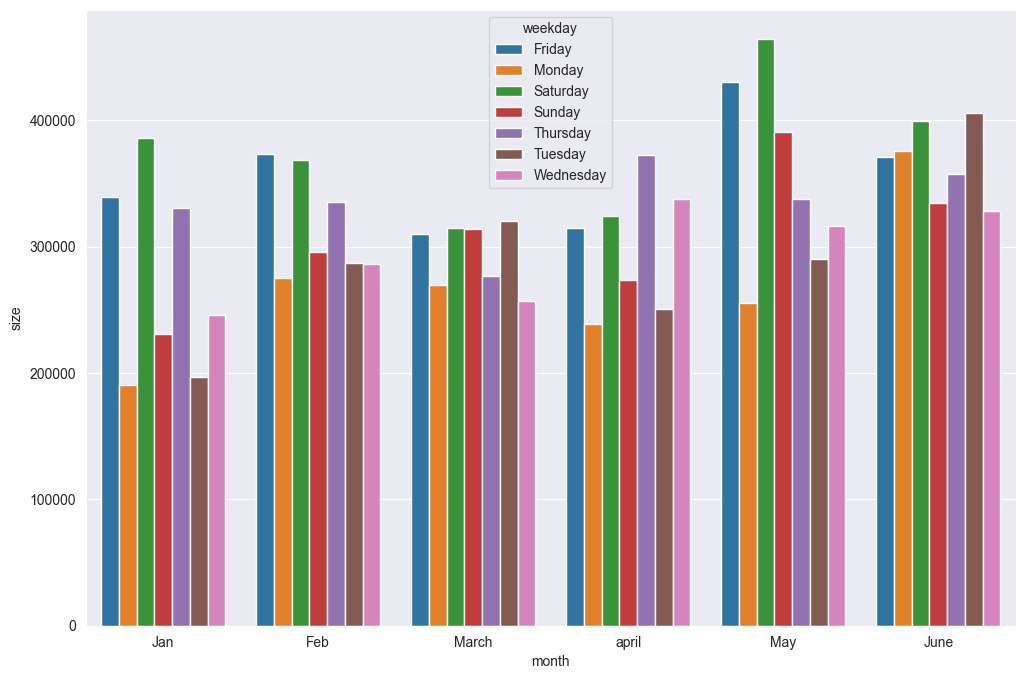

In [19]:
# Visualizacion
plt.figure(figsize=(12,8))
sns.barplot(x='month',y='size',hue='weekday',data=temp)

---
*Gracias al análisis realizado, se pudo observar que: Los días que presenta mayor cantidad de viajes en la ciudad de Nueva York fueron los sábados del mes de __abril__, con un total de __464298__ viajes.*
---
---

## 3 - Horas con mayor cantidad de actividad
Con este análisis, se pretende encontrar las horas con mayor cantidad de viajes realizados en la ciudad de Nueva York.

In [20]:
# Obteniendo la sumatoria de la cantidad de viajes realizados por horas de cada día en particular
summary = data.groupby(['weekday','hour'],as_index=False).size()
summary

,weekday,hour,size
0,Friday,0,79879
1,Friday,1,44563
2,Friday,2,27252
3,Friday,3,19076
4,Friday,4,23049
...,...,...,...
163,Wednesday,19,131317
164,Wednesday,20,123490
165,Wednesday,21,120941
166,Wednesday,22,115208


<AxesSubplot: xlabel='hour', ylabel='size'>

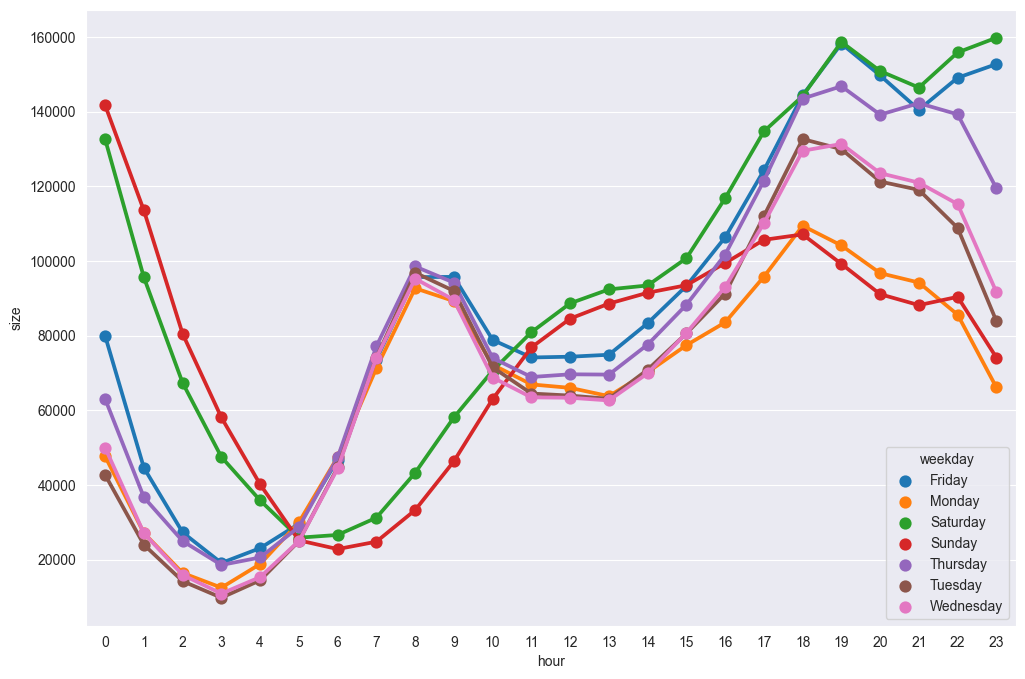

In [21]:
# Visualización
plt.figure(figsize=(12,8))
sns.pointplot(x='hour',y='size',hue='weekday',data=summary)

---
<b>Con este análisis, se puede observar quelas principales horas pico en cuanto a mayor cantidad de viajes, se presentan los siguientes comportamientos:
    - La menor demanda de viajes se encuentra a las 5 am sin importar el día.
    - Los días: lunes, martes, miércoles, jueves y viernes presentan un marcado ascenso en la cantidad de viajes desde las 5 am hasta encontrar su primer pico entre las 7 am y las 8 am. (Personas ingresando a sus trabajos)
    - Desde la 1 pm hasta las 7 pm se observa un importante aumento en todos los horarios. (Personas regresando a sus hogares)
    - Los días: viernes y sábados, presentan un último tipo en los horarios correspondientes a partir de las 9 pm. (Esparcimiento)
<b>
---
---